In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# Steps - KNN

1.   Assume number of Clusters (here K = 3)
2.   Randomly choosing as many centroids for the clusters.
3.   Find which cluster each data point belongs to.
    -   For KNN distances to be clculated are Euclidian distances, hence we calculate euclidian distances between each data     points and each centroids. 
    -   To do this efficiently, we can use, numpy, linalg.norm to calculate the Euclidian distance.

4.   Calculate the new means of each cluster (new centroid).
5.   Repeat the above steps until theer is no movement in centorid or data points. 


# 1.1 Implementation of KNN from Scratch 

In [ ]:
col = ['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
                            'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                   names = ['Sample ID Number', 'Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
                            'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
                  )

In [ ]:
#Intitalising teh centroids

def centroids_init(k, data):
    dimensions_n = data.shape[1]                         
    centroid_min = data.min().min()          
    centroid_max = data.max().max()
    centroids = []
    for centroid in range(k):
        centroid = np.random.uniform(centroid_min, centroid_max, dimensions_n)  
        centroids.append(centroid)   
    centroids = pd.DataFrame(centroids, columns = data.columns)  
    return centroids

In [ ]:
def error_calculation(pt1,pt2):  # finding the eucledian distance
    sq_error = np.square(np.sum((pt1-pt2)**2)) 
    return sq_error 

In [ ]:
def centroid_assigning(data, centroids):
    n_observe = data.shape[0]
    centroid_assign = []
    centroid_err = []
    k = centroids.shape[0]
    for observation in range(n_observe):
        errors = np.array([])
        for centroid in range(k):
            error = error_calculation(centroids.iloc[centroid, :2], data.iloc[observation,:2])
            errors = np.append(errors, error)
        closest_centroid =  np.where(errors == np.amin(errors))[0].tolist()[0]  
        centroid_error = np.amin(errors)
        centroid_assign.append(closest_centroid)  
        centroid_err.append(centroid_error)
    return (centroid_assign, centroid_err)

In [ ]:
def KNN(data, k):
    centroids = centroids_init(k, data)
    error_set = []
    flag = True
    i = 0
    while(flag):
        data['centroid'], iter_error_set = centroid_assigning(data,centroids)
        error_set.append(sum(iter_error_set))
        centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)
        if(len(error_set)<2):
            flag = True
        else:
            if(round(error_set[i],3) !=  round(error_set[i-1],3)):
                flag = True
            else:
                flag = False
        i = i + 1 
    data['centroid'], iter_error_set = centroid_assigning(data,centroids)
    centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)
    return (data['centroid'], iter_error_set, centroids)

In [ ]:
data

,Sample ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
data = data.drop(['Sample ID Number'],axis = 1)
data.dtypes

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [ ]:
# Bare Nuclei is a continous variable, heance it must be encoded before appling KNN.
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
label_encode = LabelEncoder()
label_encode_encoded = label_encode.fit_transform(data[['Bare Nuclei']])
data['Bare Nuclei'] = label_encode_encoded

C:\Users\18125\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
data.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

# 1.2 Loading the data set of 699 samples x 10 features

In [ ]:
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,0,3,1,1,2
1,5,4,4,5,7,1,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,0,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [ ]:
df = data.drop(['Class'],axis=1)
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,0,3,1,1
1,5,4,4,5,7,1,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,0,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [ ]:
B = data['Class'] == 2
M = data['Class'] == 4

In [ ]:
data.loc[B,'Class'] = 0
data.loc[M,'Class'] = 1
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,0,3,1,1,0
1,5,4,4,5,7,1,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,0,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [ ]:
df = data.drop(['Class'],axis=1)
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,0,3,1,1
1,5,4,4,5,7,1,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,0,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [ ]:
df['centroid'], without_class_labels_error, centroids =  KNN(df,5)
#df['centroid'].head()  

In [ ]:
valid = 0
for i,j in zip(df['centroid'],data['Class']):
  if i == j:
    valid += 1

accuracy_without_labels = (valid / data.shape[0])*100
print(accuracy_without_labels)

50.21459227467812


In [ ]:
sum(without_class_labels_error)

6179.026367000532

In [ ]:
data['centroid'], with_class_labels_error, centroids =  KNN(df,5)
data['centroid'].head()  

0    3
1    2
2    1
3    0
4    3
Name: centroid, dtype: int64

In [ ]:
sum(with_class_labels_error)

7102.549108332421

In [ ]:
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,centroid
0,5,1,1,1,2,0,3,1,1,0,3
1,5,4,4,5,7,1,3,2,1,0,2
2,3,1,1,1,2,2,3,1,1,0,1
3,6,8,8,1,3,4,3,7,1,0,0
4,4,1,1,3,2,0,3,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0,1
695,2,1,1,1,2,0,1,1,1,0,1
696,5,10,10,3,7,3,8,10,2,1,0
697,4,8,6,4,3,4,10,6,1,1,2


In [ ]:
valid = 0
for i,j in zip(data['centroid'],data['Class']):
  if i == j:
    valid += 1

In [ ]:
accuracy_labels = (valid / data.shape[0])*100
print(accuracy_labels)

1.0014306151645207


In [ ]:
print("summation(without class labels) : ",sum(without_class_labels_error))
print("summation(with class labels)  : ",sum(with_class_labels_error))

summation(without class labels) :  6179.026367000532
summation(with class labels)  :  7102.549108332421


# 1.3 Accuracy with and without labels

In [ ]:
print("accuracy (without class label ): ",accuracy_without_labels)
print("accuracy (with class labels ): ", accuracy_labels)

accuracy (without class label ):  50.21459227467812
accuracy (with class labels ):  1.0014306151645207


# 1.4(a) Running KNN for several different centres

In [ ]:
K_Values = [2,4,6,8,10,12, 20, 30, 60, 100, 150,180,190,195,  200, 210, 235, 250]

classify = []
errors = []
centroids = []
accuracy = []

for i in range(len(K_Values)):

    np.random.seed(i)

    iter_class, iter_error, iter_centroid = KNN(data,2)
    valid = 0
    for i,j in zip(data['centroid'],data['Class']):
      if i == j:
        valid += 1
    accuracy_labels = (valid / data.shape[0])*100
    classify.append(iter_class)
    errors.append(sum(iter_error))
    centroids.append(iter_centroid)
    accuracy.append(accuracy_labels)
errors

[46215.180644651606,
 46215.180644651606,
 46224.21352864208,
 46215.180644651606,
 46224.21352864208,
 46215.180644651606,
 46224.21352864208,
 46224.21352864208,
 46215.180644651606,
 46215.180644651606,
 46215.180644651606,
 46215.180644651606,
 46224.21352864208,
 46224.21352864208,
 46215.180644651606,
 46224.21352864208,
 46215.180644651606,
 46215.180644651606]

In [ ]:
accuracy

[7.439198855507868,
 7.439198855507868,
 92.84692417739629,
 7.439198855507868,
 7.1530758226037205,
 7.439198855507868,
 7.1530758226037205,
 92.84692417739629,
 7.439198855507868,
 92.56080114449213,
 92.56080114449213,
 92.56080114449213,
 92.84692417739629,
 7.1530758226037205,
 7.439198855507868,
 7.1530758226037205,
 92.56080114449213,
 92.56080114449213]

# 1.4(b) Explain

### There is no much change in the above error values, but there is some change in accuracy values,   to select the value of K that fits your data, we run the KNN algorithm multiple times with different K values using accuracy as a performance indicator. If the value of accuracy changes proportionally to the change in K, then it�s a good candidate for our K value.

The number of features are needed to choose the best value for K,  and also the sample size per group. when there are more and more features, groups in  data , selection should be large to find a relevant value of K.

With decreasing K to 1 predictions tend to be less stable. The accuracy diminishes and also F-Measure becomes increasedly sensitive to outliers. Increase the value of K until the F-Measure value is higher than the threshold.Consider K value on the sample class distribution for better understanding. If too many data points in one group, then increase K and viceversa. 

# 1.5 Getting a better result using Supervised Model


### Conclusion -- It can be seen that using a supervised algorithm like SVC we get enhanced results as compared to the unsupervised one like KNN.

In [ ]:
from sklearn.svm import SVC
svc = SVC(probability=True)
x_train, x_test, y_train, y_test = train_test_split(data[col],data['Class'], random_state=4)

svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
print("Accuracy using SVC model : ", accuracy_percentage)

Accuracy using SVC model :  98.28571428571429


In [ ]:
logreg= LogisticRegression()

logreg.fit(x_train, y_train)

y_pred_logreg = logreg.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred_logreg)
accuracy_percentage = 100 * accuracy
print("Accuracy using Logistic Regression model : ", accuracy_percentage)

Accuracy using Logistic Regression model :  96.0


In [ ]:
####  references : https://towardsdatascience.com/build-knn-from-scratch-python-7b714c47631a#:~:text=Building%20kNN%20from%20scratch%20using%20Python%201%20Step,Nearest%20Neighbors%20...%204%20Step%204%3A%20Predictions%20
### https://anderfernandez.com/en/blog/kmeans-algorithm-python/ ;
#### https://analyticsarora.com/k-means-for-beginners-how-to-build-from-scratch-in-python/


# Question 2

references:

https://www.youtube.com/watch?v=74QFmqHOQcU

https://www.freecodecamp.org/news/an-illustrative-introduction-to-fishers-linear-discriminant-9484efee15ac/

https://www.youtube.com/watch?v=hGKt0yy9q_E

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import eig, inv, pinv


**DataSet Preparation**

In [ ]:
class Preprocessing:
  def __init__(self, processed_data, final, classes=None):
    self.classes = classes
    if self.classes is None: 
      self.classes = np.unique(final)
    #self.number_of_classes = len(self.classes)
    tmp = {}
    for x, y in zip(processed_data, final):
        if y not in self.classes:
          continue
        if y not in tmp:
            tmp[y] = [x.flatten()]
        else:
            tmp[y].append(x.flatten())
    for i in self.classes:
        tmp[i] = np.asarray(tmp[i])
    self.processed_data = tmp

  def data_ret(self):
    list1 = []
    names = []
    for key in self.processed_data:
      value=self.processed_data[key]
      list1.extend(value)
      temp=value.shape[0] * [key]
      names.extend(temp)
    list1 = np.asarray(list1)
    names = np.asarray(names)
    return list1, names
 
  def dict_data(self):
    return self.processed_data



**Model Creation**

In [ ]:
class Build:
  def __init__(self, req_size):
    self.req_size = req_size           #size of required dimensionality
    self.W = None
    self.gaussian_me=None
    self.gaussian_cov=None
    self.priors = None

  def gaussian(self, X):               #Gaussian function implementation as given in the question
    means = {}
    covariance = {}
    priors = {}  # p(Ck)
    for class_id in X:
      values=X[class_id]
      proj = np.dot(values, self.W)
      means[class_id] = np.mean(proj, axis=0)
      covariance[class_id] = np.cov(proj, rowvar=False)
      priors[class_id] = values.shape[0] / self.N
    return means, covariance, priors


  def gaussian_distribution(self, x, u, cov):                                                 #Gaussian distribution implementation as given in question
    scalar = (1. / ((2 * np.pi) ** (x.shape[0] / 2.))) * (1 / np.sqrt(np.linalg.det(cov)))
    x_sub_u = np.subtract(x, u)
    return scalar * np.exp(-np.dot(np.dot(x_sub_u, inv(cov)), x_sub_u.T) / 2.)


  def fit(self,X):                                 #fitting function in build
    k_mea = {}
    for class_i, data_i in X.items():
      k_mea[class_i] = np.mean(data_i, axis=0)
    xyz = []
    #print('check1')
    for of_i in k_mea:
      m=k_mea[of_i]
      diff = np.subtract(X[of_i],m)
      a=np.transpose(diff)
      b=np.dot(a, diff)
      xyz.append(b)
    xyz = np.asarray(xyz)
    #print('check2')
    wei_s = np.sum(xyz, axis=0) 
    abc = {}
    tally = 0

    for i in X:
      value=X[i]
      abc[i] = value.shape[0]
      tally =tally+np.sum(value, axis=0)
    #print('check2')
    q=list(abc.values())
    self.N = sum(q)
    m = tally/self.N
    list_s = []
    for cls in k_mea:
      i_m=k_mea[cls]
      dif = i_m - m
      o=np.outer(dif, dif.T)
      list_s.append(np.multiply(abc[cls], o))   
    #print('check3')      
    list_s = np.sum(list_s, axis=0)

    abc = np.dot(pinv(wei_s), list_s)
    ei_val, ei_vec = eig(abc)
    li_eig=[]
    for i in range(len(ei_val)):
      li_eig.append((ei_val[i], ei_vec[:, i]) )
    li_eig = sorted(li_eig, key=lambda x: x[0], reverse=True)
    #print('check4')
    p=[]
    for i in range(self.req_size):
      p.append(li_eig[i][1])
    self.W = np.array(p)
    self.W = np.asarray(self.W).T
    self.gaussian_me, self.gaussian_cov, self.priors = self.gaussian(X)

  def eval(self, X, y):                #eval function implementation to find accuracy, prediction of the model 
    p = self.project(X)
    proj = np.dot(X, self.W)
    #print('check1')
    list1 = []
    cla=list(self.gaussian_me.keys())
    cla.sort()
    list1 = []
    #print('check2')
    for x in p:
        rec = []
        for c in cla:
            res = self.priors[c] * self.gaussian_distribution(x, self.gaussian_me[c], self.gaussian_cov[c])
            rec.append(res)
        list1.append(rec)
    #print('check3')
    list1 = np.asarray(list1)
    #print(list1)
    guess = np.argmax(list1, axis=1)
    #print('check4')
    l=len(y)
    a=np.sum(guess == y) / l
    return a, guess, p

  def project(self, X):
      return np.dot(X, self.W)

**Train & Test Data Split**

In [ ]:
data = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
train_c = Preprocessing(x_train, y_train)
#print(train_c)
test_c = Preprocessing(x_test, y_test)
#print(test_c)
y_label = y_test


**Dimension 2(D'=2) Build**

In [ ]:
clf = Build(2)
clf.fit(train_c.dict_data())

x_test, y_test = test_c.data_ret()
#print('wege')
accuracy, prediction, projection = clf.eval(x_test, y_test)
print("Accuracy for Dimesion=2 is" +str(accuracy))

Accuracy for Dimesion=2 is0.565


**2D Plot of D'=2**

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


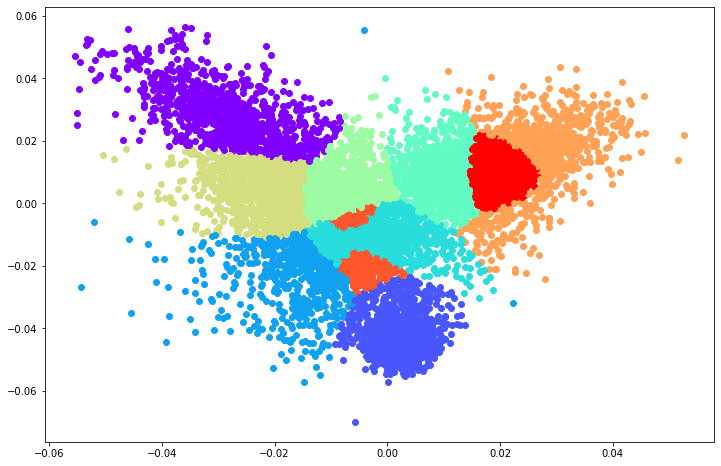

In [ ]:
cla = np.unique(y_test)
li_cl=np.linspace(0, 1, len(cla))
clr = cm.rainbow(li_cl)
cl_la={}
for i in range(len(cla)):
  cl_la[cla[i]]=clr[i]
plt.figure(figsize=(12,8))
for i, pred in zip(projection, prediction):
    plt.scatter(i[0], i[1], color=cl_la[pred])
plt.show()

The above figure is 2D plot of the prediction where different rainbow colours represent different classses. It is the graph after applying Fisher Dicriminant because of which the overlapping of different classes' points reduces

 **3-Dimension Figure Plot for D'=3**


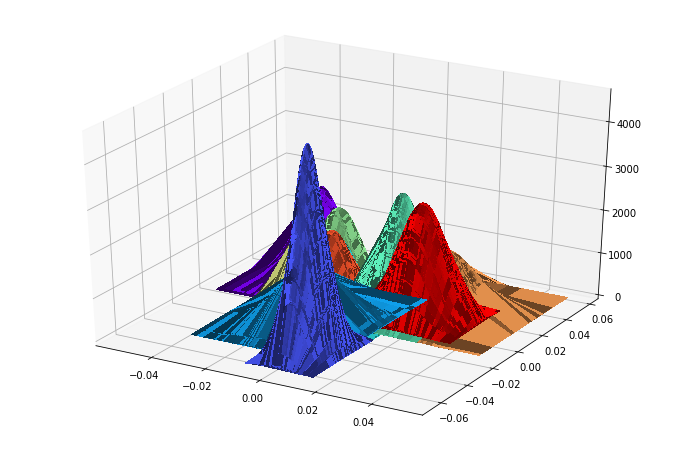

In [ ]:
fig = plt.figure(figsize=(12,8))
pl_3 = fig.add_subplot(111, projection='3d')
for i in cla:
  val= np.random.multivariate_normal(clf.gaussian_me[i].real, clf.gaussian_cov[i].real, size=150)
  x_cor,y_cor=np.meshgrid(val.T[0], val.T[1])
  p=[]
  for cor in zip(np.ravel(x_cor), np.ravel(y_cor)):
    p.append(clf.gaussian_distribution(np.array(cor), clf.gaussian_me[i].real, clf.gaussian_cov[i].real))
  cor = np.array(p)
  Z = cor.reshape(x_cor.shape)
  pl_3.plot_surface(x_cor, y_cor, Z, rstride=1, cstride=1, color=cl_la[i], linewidth=0,antialiased=False)
plt.show()

We can see that the different colors in the above graph represents different classes in the 3D graph where different colors start at different heights and coordinfates and with different size of the curves

**Dimension 3(D'=3) Build**

In [ ]:
clf = Build(3)
clf.fit(train_c.dict_data())
x_test, y_test = test_c.data_ret()
#print('wege')
accuracy, prediction, projection = clf.eval(x_test, y_test)
print("Accuracy for Dimesion 3 is " +str(accuracy))

Accuracy for Dimesion 3 is 0.7424


**Plot for D'=3** 

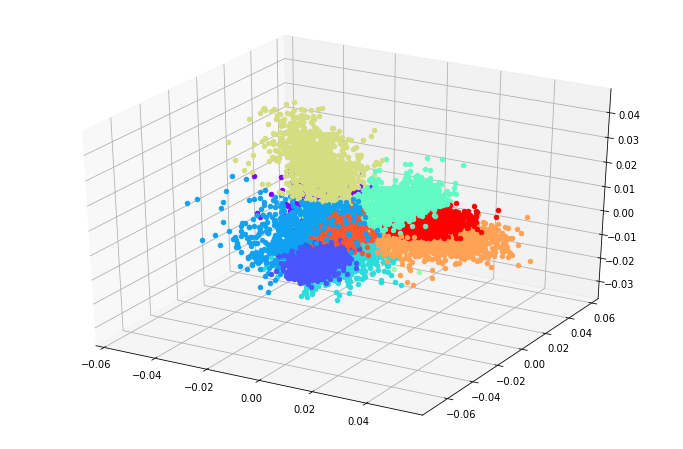

In [ ]:
cla = np.unique(y_test)
li_cl=np.linspace(0, 1, len(cla))
clr = cm.rainbow(li_cl)
cl_la={}
for i in range(len(cla)):
  cl_la[cla[i]]=clr[i]
fig=plt.figure(figsize=(12,8))
axis=fig.add_subplot(111,projection='3d')
for pll, p in zip(projection, prediction):
    axis.scatter(pll[0].real, pll[1].real, pll[2].real, color=cl_la[p])
plt.show()


in the above graph differnt colours represent different classes present in the dataset after it is converted in 3D data with Fichetr Discriminant



```
# This is formatted as code
```

# Question 3

In [1]:
import numpy as np
from numpy.matlib import repmat as rpmat
import matplotlib.pyplot as plt

In [2]:
def toydata(N,OFFSET):
    elements = np.random.randn(N,2)
    #now converting second half of the elements into normal distrubution with OFFSET as mean
    elements[int(N/2):,:] +=OFFSET
    classes = np.ones(N)
    # as stated, changing samples with OFFSET to class 2
    classes[int(N/2):]*=2
    shuffle = np.random.permutation(N)
    elements = elements[shuffle,:]
    classes = classes[shuffle]
    return elements, classes

In [3]:

# def normal_dist_pdf(x,mu,sigma):
#     return np.exp(-0.5*((x-mu)/sigma)**2)*(np.sqrt(2*np.pi)*sigma)
def calculate_pdf(x,mean,sigma=1):
    return np.exp(-0.5*np.power((x-mean)/sigma,2))/(np.sqrt(2*np.pi)*sigma)
def computeybar(x,OFFSET):
    shape = x.shape
    ybar = np.zeros(shape[0])
    pxy1 = calculate_pdf(x,0) #by defualt this function assume covariance is 1
    pxy2 = calculate_pdf(x,OFFSET)
    pxy1=pxy1[:,0]*pxy1[:,1]
    pxy2=pxy2[:,0]*pxy2[:,1]
    # as we have equal distribution of class 1 and class 2 in toydata function
    py1 = 0.5
    py2 = 0.5
    py = (pxy1*py1)+(pxy2*py2)
    py1x = (pxy1*py1/py)
    py2x = (pxy2*py2/py)
    
    ybar = py1x+py2x*2
    return ybar



In [4]:
def l2distance(x, z=None):
    # lets define a function that defines l2 regulization
    if z is not None:
        n, d = x.shape
        m, _ = z.shape
        s1 = np.sum(np.power(x, 2), axis=1).reshape(-1,1)
        s2 = np.sum(np.power(z, 2), axis=1).reshape(1,-1)
        D1 = -2 * np.dot(x, z.T) + rpmat(s1, 1, m)
        delta = D1 + rpmat(s2, n, 1)
        delta = np.sqrt(np.maximum(delta, 0))
    else:
        n, d = x.shape
        s1 = np.sum(np.power(x, 2), axis=1).reshape(-1,1)
        D1 = -2 * np.dot(x, x.T) + rpmat(s1, 1, n)
        delta = D1 + rpmat(s1.T, n, 1)
        np.fill_diagonal(delta, 0)
        delta = np.sqrt(np.maximum(delta, 0))
        
    return delta

In [5]:
def kernel(x,z,sigma):
    return np.power(1+(np.power(l2distance(x,z),2) / (2 * (sigma)**2)),-4)
def ridge(kernal,lmbda):
    return kernal + lmbda * np.eye(kernal.shape[0], kernal.shape[1])
def RidgeRegression(x,y,sigma=0.1,lmbda=0.01):
    beta = np.linalg.solve(ridge(kernel(x, x,sigma), lmbda), y)
    
    fun = lambda Xt: np.dot(kernel(Xt, x,sigma), beta)
    return fun
# referred https://www.youtube.com/watch?v=WatqxWFhcZk to code

In [6]:
def computehbar(x,sigma,lmbd,subsample_data,iteration,OFFSET):
    length = x.shape[0]
    hbar = np.zeros(length)
    for avm in range(iteration):
        x_t,y_t = toydata(subsample_data,OFFSET) #subsampling data from same population
        ridge_model = RidgeRegression(x_t,y_t,sigma,lmbd)
        hbar+=ridge_model(x)
    hbar/=iteration
    return hbar

In [7]:
def computevariance(x,sigma,lmbd,hbar,subsample_data,iterations,OFFSET):
    length = x.shape[0]
    variance = np.zeros(length)
    for avm in range(iterations):
        x_t, y_t = toydata(subsample_data,OFFSET)
        ridge_model = RidgeRegression(x_t,y_t,sigma,lmbd)
        variance += (ridge_model(x)-hbar)**2
    return np.mean(variance)/iterations # as variance is mean((hbar-mean(hbar))^2)
    

In [8]:
def computebiasvariance(OFFSET):
    subsample = 10
    N = 10000
    iterations = 100
    lmbdas = np.arange(-6, 0+0.5, 0.5)
    sigma = 4 #kernal width

    length = len(lmbdas)
    final_bias = np.zeros(length)
    final_variance = np.zeros(length)
    total_mse = np.zeros(length)
    final_noise = np.zeros(length)
    bvn_sum = np.zeros(length)
    for avm in range(length):
        lmbda = 2 ** lmbdas[avm]
        
        x,y = toydata(N,OFFSET)
        total = 0
        for j in range(iterations):
            x_t,y_t = toydata(subsample,OFFSET)
            fsmall = RidgeRegression(x_t,y_t,sigma,lmbda)
            total += np.mean((fsmall(x) - y) ** 2)
        total /= iterations
        
        ybar = computeybar(x, OFFSET)
        noise = np.mean((y-ybar) ** 2)
        
        hbar = computehbar(x,sigma, lmbda, subsample, iterations, OFFSET)
        bias = np.mean((hbar-ybar) ** 2)
        
        variance = computevariance(x,sigma,lmbda,hbar, subsample, iterations, OFFSET)
        
        final_bias[avm] = bias
        final_variance[avm] = variance
        total_mse[avm] = total
        final_noise[avm] = noise
        bvn_sum[avm] = final_bias[avm]+final_variance[avm]+final_noise[avm]
    plt.figure(figsize=(12,6))
    plt.plot(final_bias[:length],c='r',linestyle='-',linewidth=2)
    plt.plot(final_variance[:length],c='k', linestyle='-',linewidth=2)
    plt.plot(final_noise[:length],c='g', linestyle='-',linewidth=2)
    plt.plot(total_mse[:length],c='b', linestyle='-',linewidth=2)
    plt.plot(bvn_sum[:length],c='k', linestyle='--',linewidth=2)

    plt.legend(["Bias","Variance","Noise","Test error","Bias+Var+Noise"])
    plt.xlabel("Regularization $\lambda=2^x$",fontsize=18)
    plt.ylabel("Squared Error",fontsize=18)
    plt.xticks([i for i in range(length)],lmbdas)

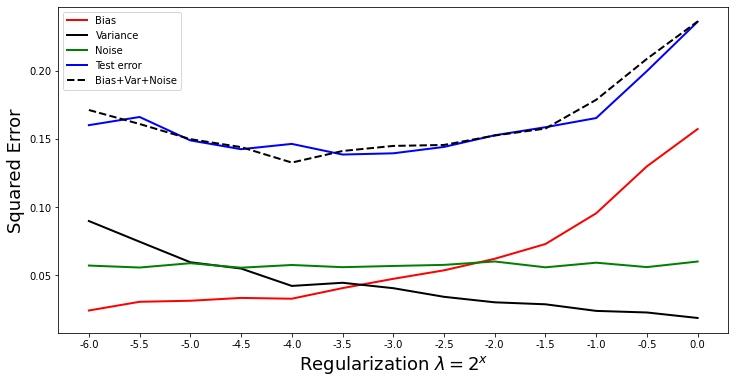

In [9]:
computebiasvariance(2)